In [27]:
      
# Perform imports and load the UPDATED dataset:
import pandas as pd
import numpy as np # Often useful, good to import

# Load the CSV file you labeled
try:
    df_reviews = pd.read_csv("Processed_Reviews.csv") # Use the correct filename
except FileNotFoundError:
    print("Error: Processed_Reviews.csv not found. Make sure it's in the same directory.")
    # Handle the error appropriately, maybe exit or prompt user
    exit()


# Display shape and head to verify
print(df_reviews.shape)
print(df_reviews.head())
print(df_reviews.info()) # Check column names and types, especially 'lemmatized' and 'label'

    

(13, 15)
                                              Review  \
0  The product arrived on time. Packaging was gre...   
1           THIS PRODUCT IS JUST AMAZING! I LOVE IT.   
2  I bought this phone for $799, and it has a 120...   
3  Wow!!! This product is awesome... but a bit ex...   
4                The laptop works perfectly fine.      

                                          lowercased  \
0  the product arrived on time. packaging was gre...   
1           this product is just amazing! i love it.   
2  i bought this phone for $799, and it has a 120...   
3  wow!!! this product is awesome... but a bit ex...   
4                the laptop works perfectly fine.      

                                        urls_removed  \
0  the product arrived on time. packaging was gre...   
1           this product is just amazing! i love it.   
2  i bought this phone for $799, and it has a 120...   
3  wow!!! this product is awesome... but a bit ex...   
4                the laptop works per

In [29]:
# --- Pre-processing ---

# Select the features (X) and target (y)
# Handle potential NaN values in 'lemmatized' column by filling with empty string
df_reviews['lemmatized'] = df_reviews['lemmatized'].fillna('')

X_text = df_reviews['lemmatized']
y = df_reviews['label'] # Assuming the column is named 'label' and contains 0s and 1s

# Verify the data types and check for NaNs again if necessary
print(X_text.head())
print(y.head())
print(f"Is there any NaN in X_text? {X_text.isnull().any()}")
print(f"Is there any NaN in y? {y.isnull().any()}")
# Ensure labels are numeric (if they weren't already 0/1)

0    product arrive time packaging great quality am...
1                                   product amaze love
2                   buy phone hz display totally worth
3                    wow product awesome bit expensive
4                           laptop work perfectly fine
Name: lemmatized, dtype: object
0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64
Is there any NaN in X_text? False
Is there any NaN in y? False


In [31]:
# --- Vectorization ---
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X_text)

print(f"Shape of TF-IDF matrix: {X_tfidf.shape}")

Shape of TF-IDF matrix: (13, 53)


In [33]:
# --- Model Training ---
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42) # Using a 75/25 split

# Train Naive Bayes
nb_clf = MultinomialNB().fit(X_train, y_train)
print("Naive Bayes model trained.")

Naive Bayes model trained.



--- Naive Bayes Classifier Report ---
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           0       0.00      0.00      0.00         0

    accuracy                           1.00         4
   macro avg       0.50      0.50      0.50         4
weighted avg       1.00      1.00      1.00         4

Naive Bayes Accuracy: 1.0000
Naive Bayes Error Rate: 0.0000


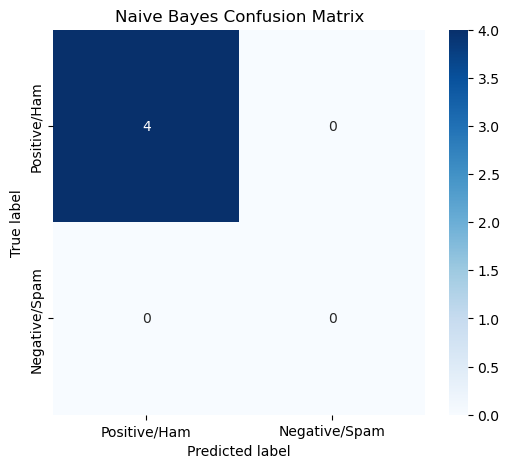


--- Data Verification ---
Unique values in y_test: [1]
Value counts in y_test:
 label
1    4
Name: count, dtype: int64

Unique values in nb_predicted: [1]
Value counts in nb_predicted:
 1    4
Name: count, dtype: int64


In [43]:
# --- Performance Evaluation ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Ensure numpy is imported

# Define all possible labels expected in your dataset
all_possible_labels = [1, 0] 

# --- Naive Bayes Evaluation ---
nb_predicted = nb_clf.predict(X_test)
nb_report = classification_report(y_test, nb_predicted, labels=all_possible_labels, zero_division=0) # Added labels and zero_division
nb_accuracy = accuracy_score(y_test, nb_predicted)
# Use the 'labels' parameter here:
nb_cm = confusion_matrix(y_test, nb_predicted, labels=all_possible_labels)

print("\n--- Naive Bayes Classifier Report ---")
print(nb_report)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes Error Rate: {(1 - nb_accuracy):.4f}")


# --- Confusion Matrix Plotting ---
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    # Ensure classes match the order in all_possible_labels if they are strings
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Define class names corresponding to the order in all_possible_labels
class_names = ['Positive/Ham', 'Negative/Spam'] # Adjust if your labels mean something else

# Plot for Naive Bayes
plot_confusion_matrix(nb_cm, classes=class_names, title='Naive Bayes Confusion Matrix')


# --- Optional: Verify unique values ---
print("\n--- Data Verification ---")
print("Unique values in y_test:", np.unique(y_test))
print("Value counts in y_test:\n", pd.Series(y_test).value_counts()) # Use pandas Series for easy value counts
print("\nUnique values in nb_predicted:", np.unique(nb_predicted))
print("Value counts in nb_predicted:\n", pd.Series(nb_predicted).value_counts())
